In [1]:
import psycopg2
import pandas as pd
from functions import *
import numpy as np

In [2]:
DB_SETTINGS = {
    "host": "localhost",
    "port": "5432",
    "database": "postgres",
    "user": "postgres",
    "password": "30486"
}

In [2]:
trop = pd.read_csv('BZR2.csv')


In [11]:
trop['trop'] = trop['TROP'] /1000
trop.head()

,STN,TIME,TROP,TROPSD,TGN,TGNSD,TGE,TGESD,trop
0,BZR2,24:334:00000,2279.3,3.5,0.245,0.498,0.177,0.496,2.2793
1,BZR2,24:334:00300,2279.2,3.3,0.241,0.483,0.180,0.483,2.2792
2,BZR2,24:334:00600,2279.5,3.2,0.237,0.478,0.184,0.479,2.2795
3,BZR2,24:334:00900,2279.7,3.0,0.236,0.464,0.196,0.467,2.2797
4,BZR2,24:334:01200,2280.2,3.0,0.235,0.459,0.208,0.465,2.2802


In [14]:
trop.describe()

,TROP,TROPSD,TGN,TGNSD,TGE,TGESD,trop
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2289.054514,1.884375,-0.077090,0.262750,-0.419882,0.257812,2.289055
std,5.469865,0.303175,0.555844,0.048416,0.566491,0.061748,0.005470
min,2278.700000,1.400000,-1.175000,0.200000,-1.708000,0.182000,2.278700
25%,2284.600000,1.700000,-0.512250,0.237000,-0.944500,0.223000,2.284600
50%,2289.600000,1.800000,-0.087500,0.254000,-0.289000,0.242000,2.289600
75%,2293.600000,2.000000,0.284250,0.273000,0.056500,0.264000,2.293600
max,2299.400000,3.500000,1.086000,0.498000,0.314000,0.496000,2.299400


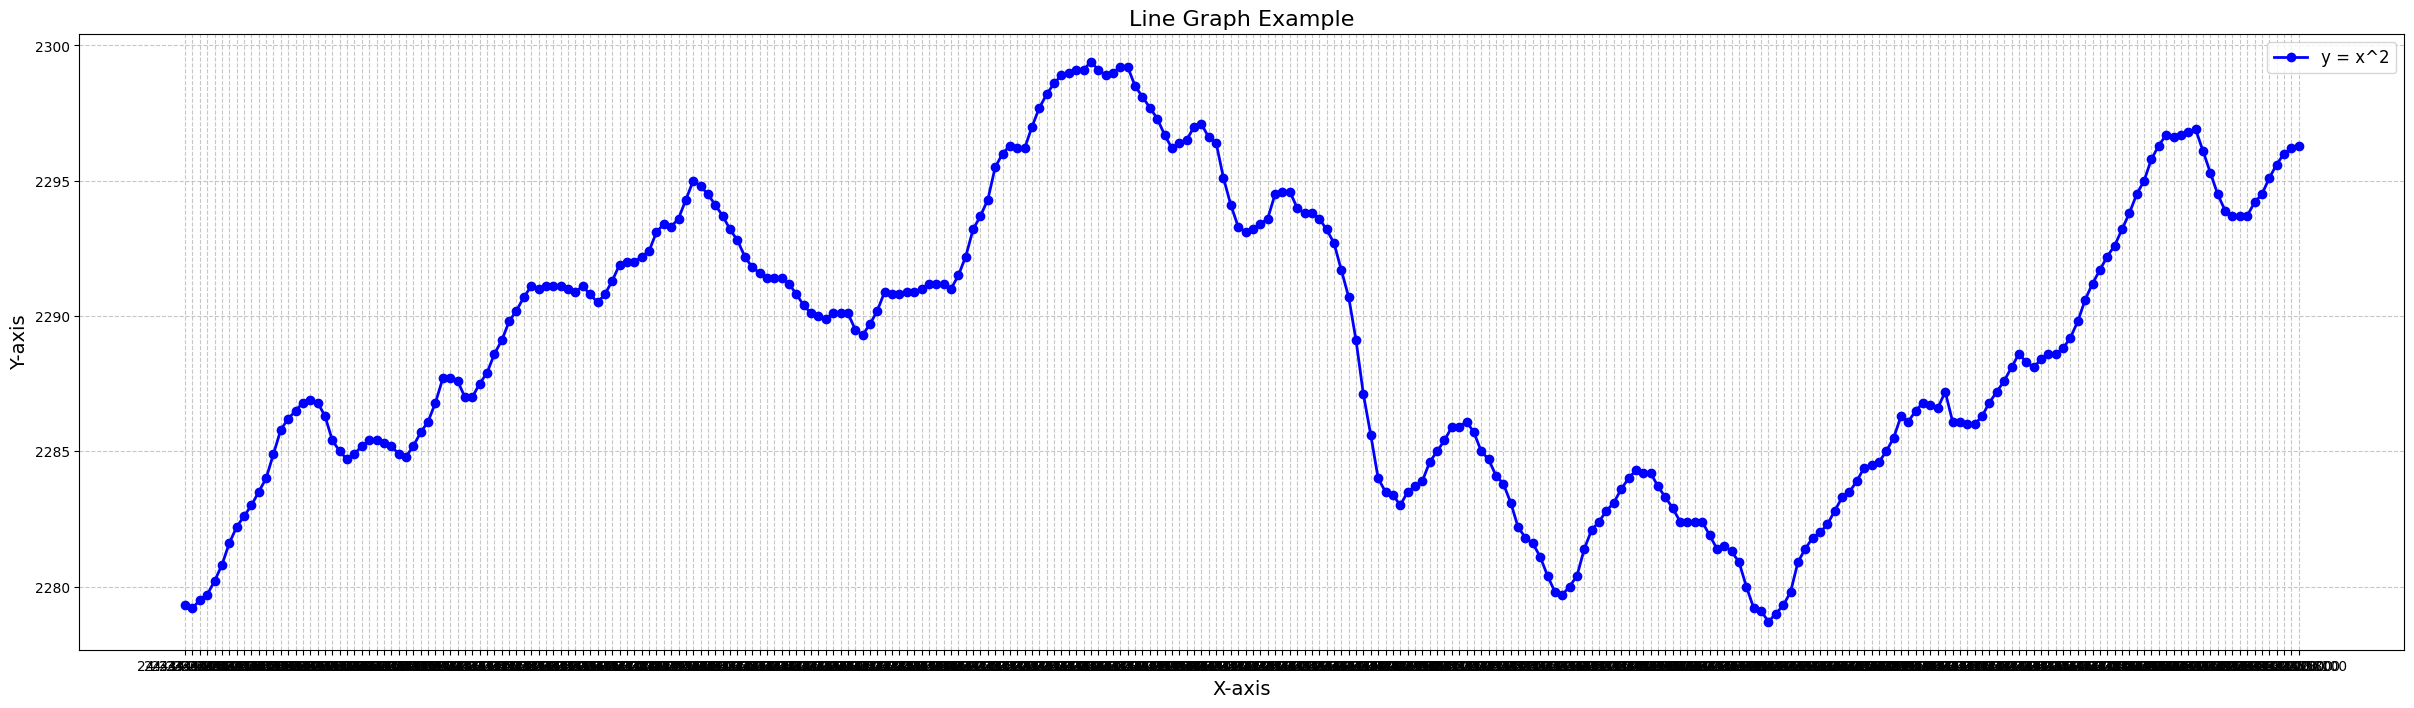

In [18]:
import matplotlib.pyplot as plt
x = trop['TIME']
y = trop['TROP']
plt.figure(figsize=(30, 8))  # Optional: Set the figure size
plt.plot(x, y, label='y = x^2', color='blue', linewidth=2, marker='o')

# Add titles and labels
plt.title('Line Graph Example', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

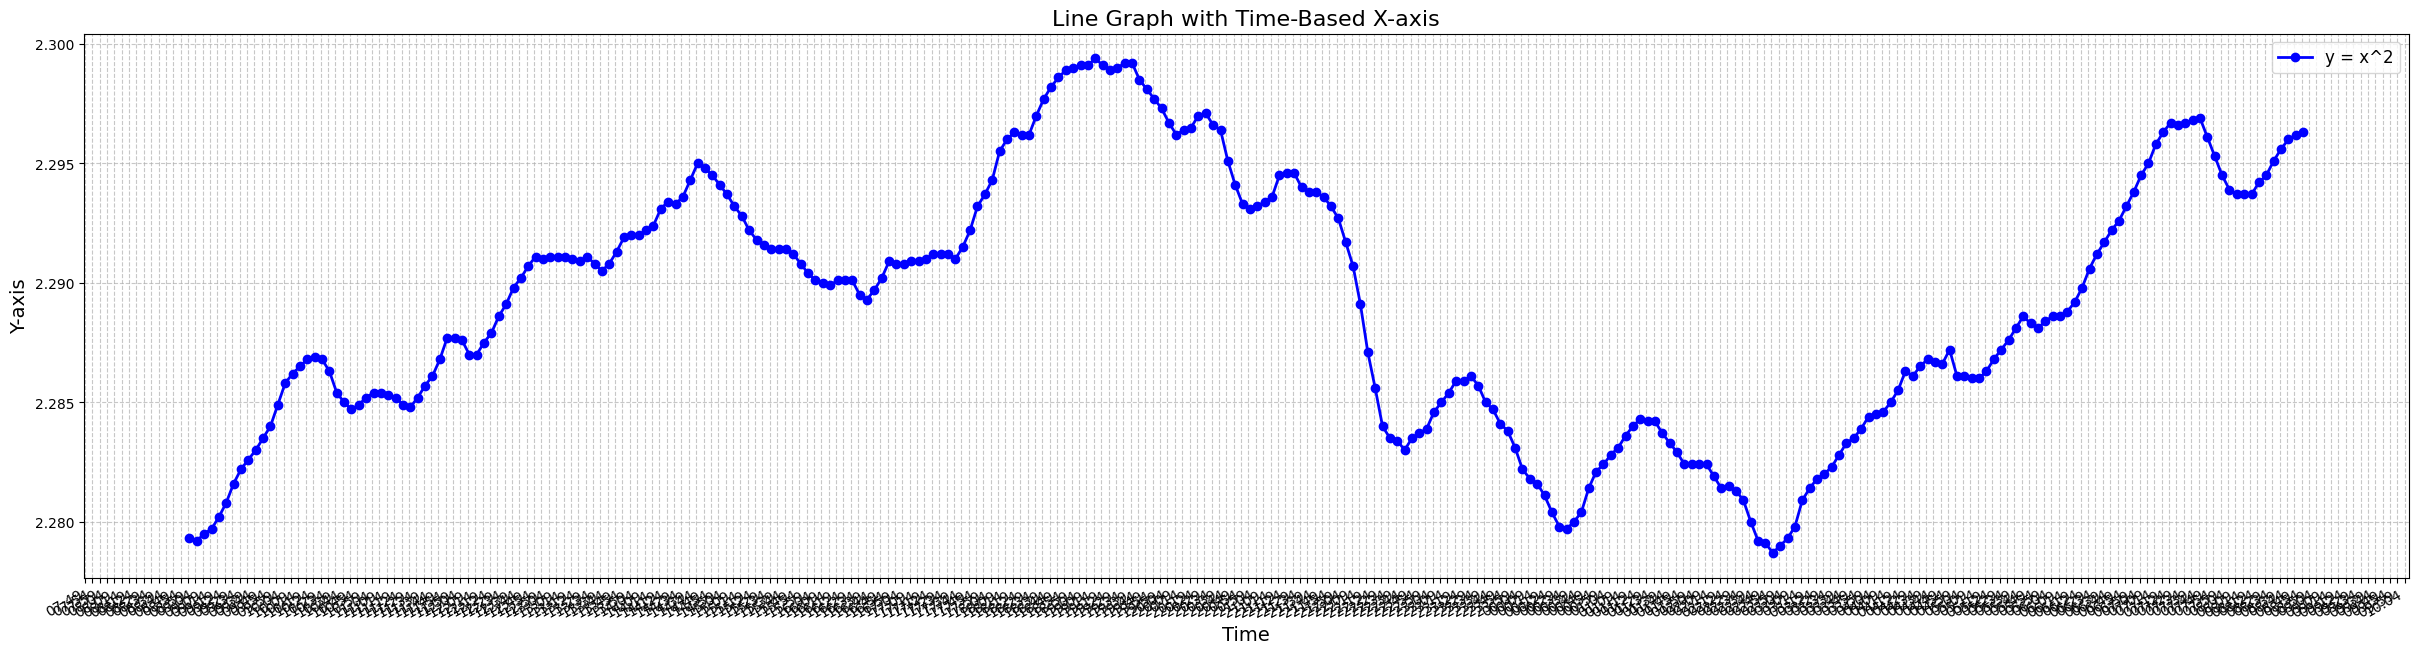

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time data
start_time = datetime(2024, 1, 1, 9, 0)  # Starting at 9:00 AM
time_data = [start_time + timedelta(minutes=5*i) for i in range(len(y))]  # 5-min intervals

# Corresponding y-values


# Create the plot
plt.figure(figsize=(30, 8))
plt.plot(time_data, y, label='y = x^2', color='blue', linewidth=2, marker='o')

# Format the x-axis for time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format: Hour:Minute
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # 5-min intervals

# Rotate the time labels for better readability
plt.gcf().autofmt_xdate()

# Add titles and labels
plt.title('Line Graph with Time-Based X-axis', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [3]:
SQL_QUERY = "SELECT * FROM positions JOIN ztd ON positions.time = ztd.time;"

In [4]:
conn = psycopg2.connect(**DB_SETTINGS)

In [5]:
positions = fetch_data(conn, SQL_QUERY)

In [6]:
positions.head()

,GPS_week,time,latitude,longitude,hight,sol,n_sat,sdn,sde,sdu,...,sdun,age,ratio,info,GPS_week,time,sol,antenna,ztd,ztdf
0,2345,299547.000,44.399881959,8.937711505,107.2823,6,5,9.6200,13.7081,21.2912,...,-9.3667,0.00,0.0,$TROP,2345,299547.000,6,1,2.3663,0.1200
1,2345,299548.000,44.399856438,8.937669580,110.5701,6,8,5.2676,7.0417,14.2059,...,-4.5486,0.00,0.0,$TROP,2345,299548.000,6,1,2.3663,0.1200
2,2345,299549.000,44.399847765,8.937673229,111.2784,6,9,3.8674,4.7096,11.5197,...,-3.2987,0.00,0.0,$TROP,2345,299549.000,6,1,2.3664,0.1200
3,2345,299550.000,44.399844758,8.937673196,111.4943,6,9,3.2145,3.8081,9.9549,...,-2.7135,0.00,0.0,$TROP,2345,299550.000,6,1,2.3665,0.1200
4,2345,299551.000,44.399842934,8.937672286,111.6841,6,9,2.8111,3.2855,8.8952,...,-2.3567,0.00,0.0,$TROP,2345,299551.000,6,1,2.3665,0.1200


In [7]:
zhd = zhd_cal(positions, 1000)

In [8]:
positions['zhd'] = zhd['zhd']

In [9]:
positions['zwd'] = positions['ztd'].astype(float) - positions['zhd']

In [10]:
positions.head()

,GPS_week,time,latitude,longitude,hight,sol,n_sat,sdn,sde,sdu,...,ratio,info,GPS_week,time,sol,antenna,ztd,ztdf,zhd,zwd
0,2345,299547.000,44.399881959,8.937711505,107.2823,6,5,9.6200,13.7081,21.2912,...,0.0,$TROP,2345,299547.000,6,1,2.3663,0.1200,2.271392,0.094908
1,2345,299548.000,44.399856438,8.937669580,110.5701,6,8,5.2676,7.0417,14.2059,...,0.0,$TROP,2345,299548.000,6,1,2.3663,0.1200,2.271391,0.094909
2,2345,299549.000,44.399847765,8.937673229,111.2784,6,9,3.8674,4.7096,11.5197,...,0.0,$TROP,2345,299549.000,6,1,2.3664,0.1200,2.271390,0.095010
3,2345,299550.000,44.399844758,8.937673196,111.4943,6,9,3.2145,3.8081,9.9549,...,0.0,$TROP,2345,299550.000,6,1,2.3665,0.1200,2.271390,0.095110
4,2345,299551.000,44.399842934,8.937672286,111.6841,6,9,2.8111,3.2855,8.8952,...,0.0,$TROP,2345,299551.000,6,1,2.3665,0.1200,2.271390,0.095110
